problem status: optimal
x = [ 0.482 -0.465  0.936  0.929]


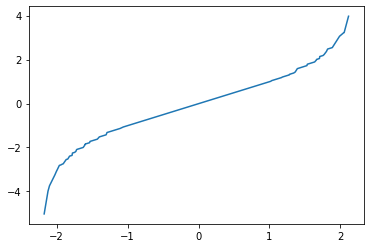

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

from nonlin_meas_data import m, n, sigma, alpha, beta, A, y
np.set_printoptions(precision=3)

EPSILON = 1e-8
#Verifying that the data is sorted
for i in range(m - 1):
    assert y[i] < y[i + 1] + EPSILON

z = cp.Variable(m)
x = cp.Variable(n)
next_diff_z = z[1:] - z[:-1]
next_diff_y = y[1:] - y[:-1]
constraints = [
        next_diff_z <= next_diff_y / alpha,
        next_diff_z >= next_diff_y / beta,
        ]
obj = cp.Minimize(cp.sum_squares(A @ x - z))
problem = cp.Problem(obj, constraints)
problem.solve()
print(f"problem status: {problem.status}")
if problem.status == 'optimal':
    print(f"x = {x.value}")
    plt.plot(y, z.value)
    plt.show()
